In [3]:
#Importamos los módulos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#-----------------------------------
#Para mostrar imagen dentro de jupyter
%matplotlib inline

## Ejercicio 1

* El archivo 'mnist_test.csv' contiene 10000 dígitos de imágenes en escala de grises guardadas como filas en el archivo CSV
* la primera columna contiene el valor de los dígitos, luego 784 columnas corresponden a píxeles
* hacer una matriz de gráficos de 25 imágenes elegidas aleatoriamente (5x5)
* título de cada imagen tiene que tener el valor del digito corespondiente (columna 0)
* pista - despues de cargar archivo a pandas dataframe mejor convertirlo entero a numpy

In [4]:
df = pd.read_csv('mnist_test.csv') #Leer archivo csv
df.head() #Mostrar primeras 5 filas de dataframe

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Sabemos que cada fila es una imagen, sin embargo, la primera columna 'label' no hace parte de la imagen.

#Guardamos la columna 'label' en un nuevo dataframe
label = df['label'] 

#Eliminaremos la columna 'label' del dataframe original
df2=df[df.columns.drop(list(df.filter(regex='label')))]

#Pasamos dataframe de pandas a numpy
df2_np = df2.to_numpy() 

df2_np.shape 
#10000 filas -> imágenes
#784 columnas -> 28 de altura x 28 de anchura

(10000, 784)

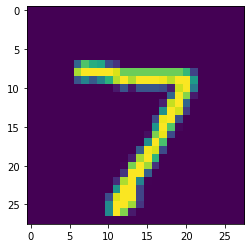

In [8]:
#Para visualizar las imágenes debemos convertir los arrays en matrices de 28x28
#Para pasar cada fila a una matriz 28x28, usaremos el método para arrays reshape
#Guardaremos cada matriz 28x28 en una lista
lista_de_imagenes = [df2_np[i].reshape(28,28) for i in range(10000)] #son 10000 filas (imagenes)

#Ya tenemos las imagenes en 28x28 listas para mostrar
plt.imshow(lista_de_imagenes[0])

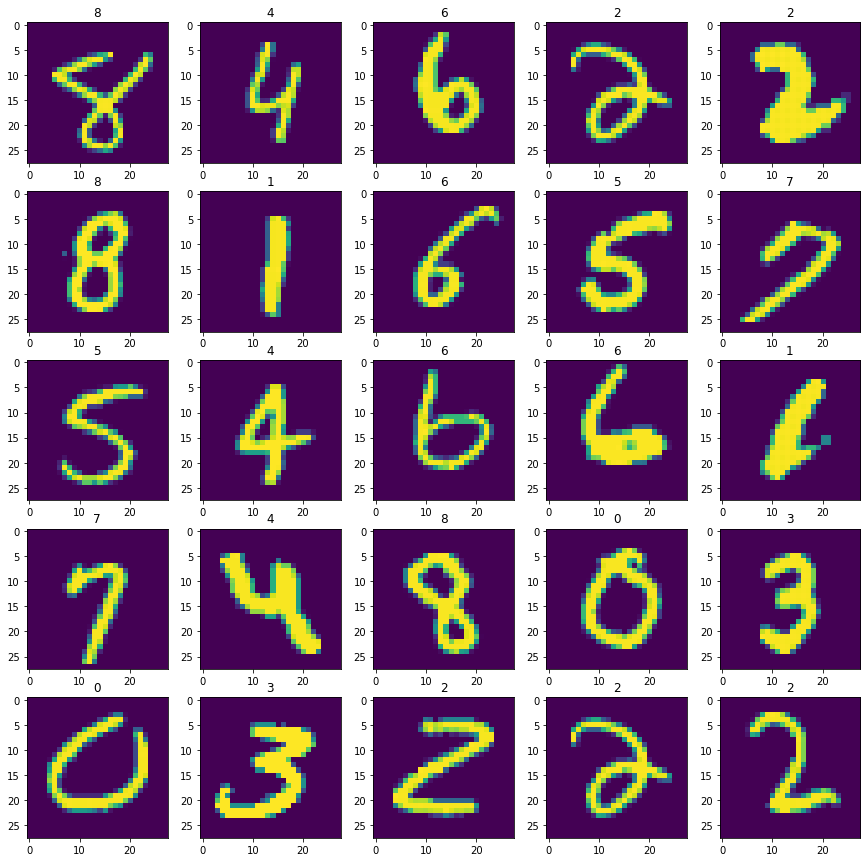

In [9]:
#para mostrar los 25 graficos de imagenes
#Creamos figura de 5x5 para mostrar las 25 imagenes
fig,ax = plt.subplots(5,5,figsize=(15,15)) 

#Hacemos doble ciclo para recorrer las filas y columnas de la matriz 5x5
for i in range(5):
    for j in range(5):
        #elegimos un número random --> lo pasamos a int
        random = int(np.random.randint(0,10000,1)) #entre 0 y 10000 porque son 10000 imágenes
        
        #mostramos el elemento [random] de la lista de imagenes
        ax[i,j].imshow(lista_de_imagenes[random]) 
        
        #ponemos como titulo el elemento [random] del dataframe label
        ax[i,j].set_title(label[random]) 
        #(coinciden en indice)

## Ejercicio 2

El conjunto de datos de dígitos de Sklearn (https://scikitlearn.org/stable/modules/generated/sklearn.datasets.load_digits.html) contiene 1797 imágenes de dígitos en escala de grises descargue el conjunto de datos (el comando está a continuación) y:

* hacer una matriz de gráficos de 25 imágenes elegidas aleatoriamente (5 imágenes x 5 imágenes)
* cada imagen de la matriz tiene que tener un título correspondiente a un dígito

pista: comienza con digits.keys()

* digits['data'] ya es una numpy array que contiene las imagenes
* digits['targets'] es numpy vector que contiene las etiquietas de los imagenes

In [15]:
from sklearn import datasets
digits = datasets.load_digits() # digits is a dictionary
digits.keys() #los keys del diccionario

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [16]:
#La key 'data' contiene las imagenes
#la key 'target' contiene las etiquetas

digits['data'][0].shape 
#las imagenes están en una fila de 64 pixeles

(64,)

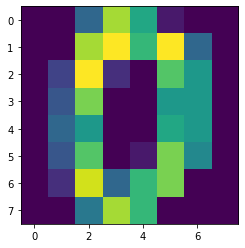

In [17]:
#Para visualizar las imágenes debemos convertir los arrays en matrices de 8x8
#Para pasar cada fila a una matriz 8x8, usaremos el método para arrays reshape
#Guardaremos cada matriz 8x8 en una lista
lista_de_imagenes = [i.reshape(8,8) for i in digits['data']]

#Ya tenemos las imagenes en 8x8 listas para mostrar
plt.imshow(lista_de_imagenes[0])

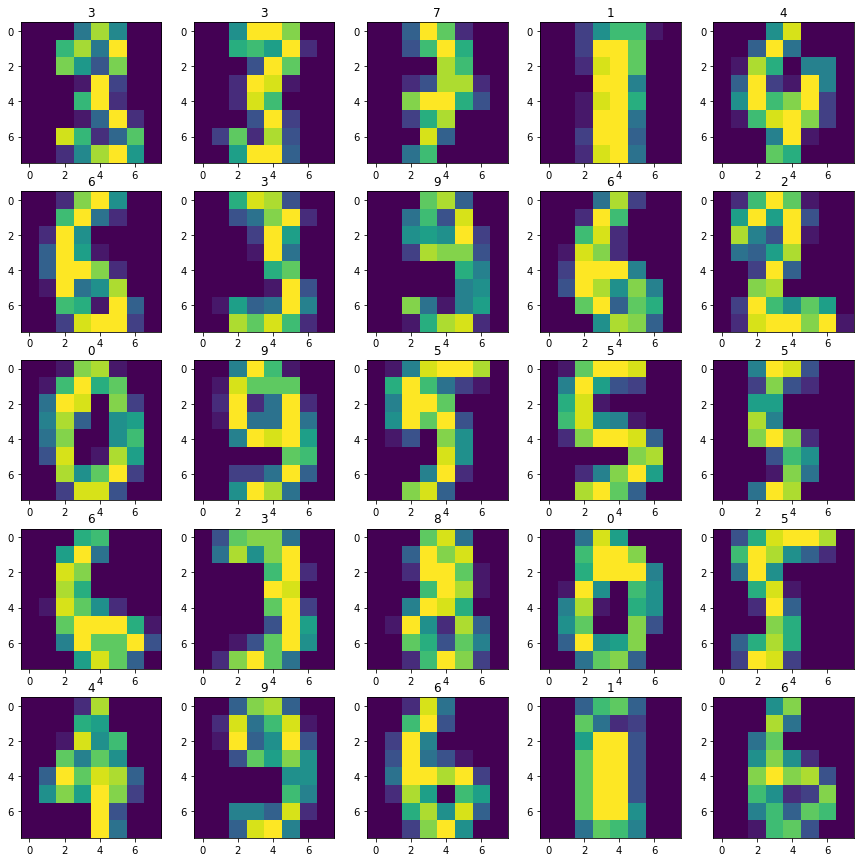

In [18]:
#para mostrar los 25 graficos de imagenes
#Creamos figura de 5x5 para mostrar las 25 imagenes
fig,ax = plt.subplots(5,5,figsize=(15,15)) 

#Hacemos doble ciclo para recorrer las filas y columnas de la matriz 5x5
for i in range(5):
    for j in range(5):
        
        #elegimos un número random --> lo pasamos a int
        random = int(np.random.randint(0,1797,1)) #entre 0 y 1797 porque son 1797 imágenes
        
        #mostramos el elemento [random] de la lista de imagenes
        ax[i,j].imshow(lista_de_imagenes[random]) 
        
        #ponemos como titulo el elemento [random] de la key de etiquetas
        ax[i,j].set_title(digits['target'][random])  
        
        #(coinciden en indice)

## Ejercicio 3
El conjunto de datos CIFAR-10 consiste, en total, en 50000 color imágenes (tres canales), cada una con una de las 10 etiquetas: avión, automóvil, pájaro, gato, ciervo, perro, rana, caballo, barco, camión.

http://www.cs.toronto.edu/~kriz/cifar.html

* hacer una matriz de gráficos de 25 imágenes elegidas aleatoriamente (5 imágenes x 5 imágenes)
* cada imagen (axis) tiene que tener un título con una etiqueta correspondiente
* convertir las imágenes en color a escala de grises promediando una de las dimensiones y volver a mostrar las imágenes:
* hacer una matriz de gráficos de 25 imágenes elegidas aleatoriamente (5 imágenes x 5 imágenes)
* cada imagen (axis) tiene que tener un título con una etiqueta correspondiente
* pista: comienza con X_data.shape y intenta entender la estructura de datos que contiene los imagenes (a que coresponde cada dimension)
* muestra primero un imagen y despues segundo imagen para confirmar si se entiende como son organizados en la array de numpy

In [2]:
import tensorflow as tf
(X_data, y_data), (_, _) = tf.keras.datasets.cifar10.load_data()
# X_data (numpy array) contiene los imagenes 
# y_data (numpy array) contiene las etiquietas

In [3]:
X_data.shape 
#50000 imagenes rgb de 32x32-> RGB = 3 capas

(50000, 32, 32, 3)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


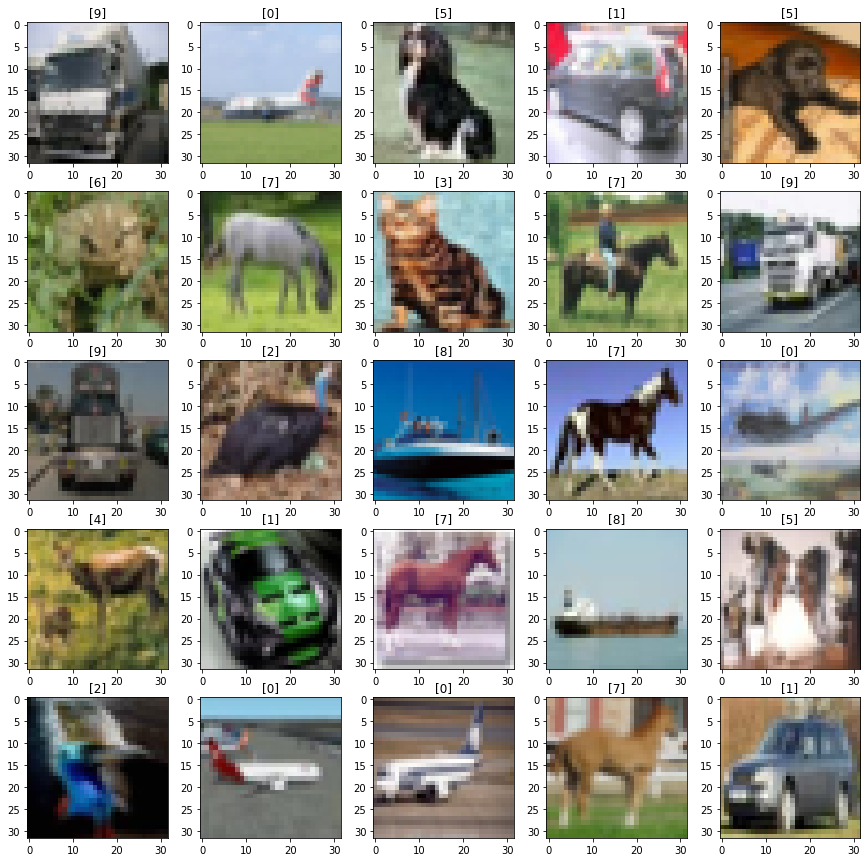

In [5]:
#para mostrar los 25 graficos de imagenes
#Creamos figura de 5x5 para mostrar las 25 imagenes
fig,ax = plt.subplots(5,5,figsize=(15,15)) 

#Hacemos doble ciclo para recorrer las filas y columnas de la matriz 5x5
for i in range(5):
    for j in range(5):
        
        #elegimos un número random --> lo pasamos a int
        random = int(np.random.randint(0,1797,1)) #entre 0 y 1797 porque son 1797 imágenes
        
        #mostramos el elemento [random] del array de imágenes
        ax[i,j].imshow(X_data[random]) 
        
        #ponemos como titulo el elemento [random] del array de etiquetas
        ax[i,j].set_title(y_data[random]) 
        
        #(coinciden en indice)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


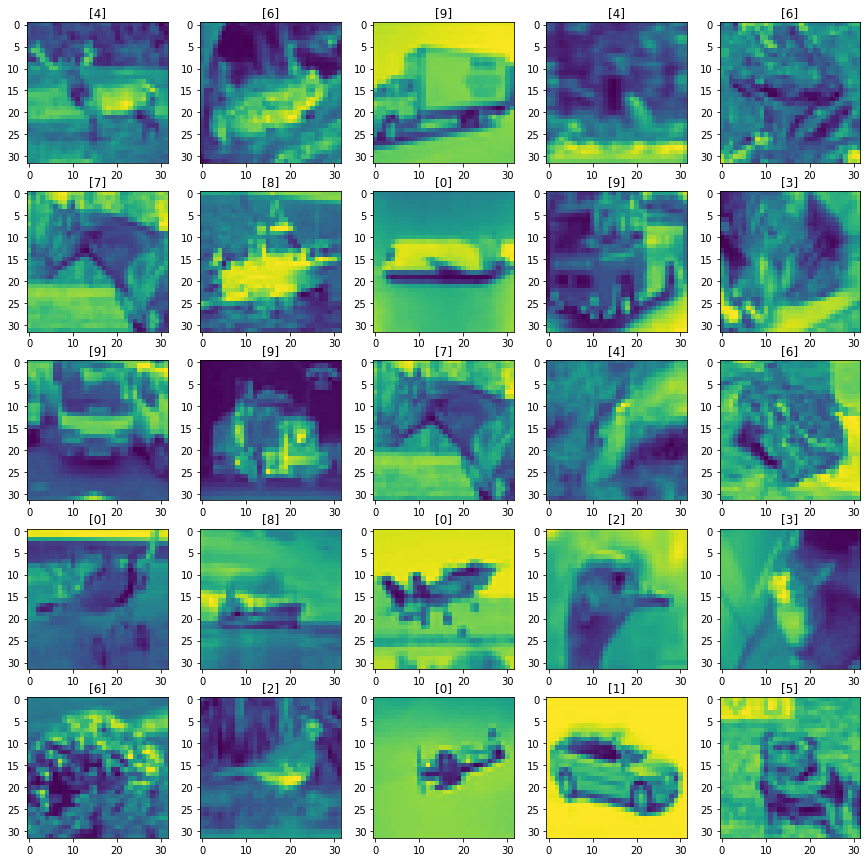

In [6]:
#para mostrar los 25 graficos de imagenes
#Creamos figura de 5x5 para mostrar las 25 imagenes
fig,ax = plt.subplots(5,5,figsize=(15,15)) 

#Hacemos doble ciclo para recorrer las filas y columnas de la matriz 5x5
for i in range(5):
    for j in range(5):
        
        #elegimos un número random --> lo pasamos a int
        random = int(np.random.randint(0,1797,1)) #entre 0 y 1797 porque son 1797 imágenes
        
        #mostramos el elemento numero random del array de imágenes
        #lo pasamos a escala de grises con el método np.average de numpy, promediando las 3 capas rgb
        ax[i,j].imshow(np.average(X_data[random],-1)) 
        
        #ponemos como titulo el elemento numero random del array de etiquetas
        ax[i,j].set_title(y_data[random]) 
        #(coinciden en indice)